# 🎓 Student Dropout Prediction using Machine Learning
**Project by**: Akhilesh – Aspiring Data Scientist / ML Engineer  
**Tools**: Python, Pandas, Scikit-learn, Seaborn, Google Colab  
**Dataset**: [xAPI-Edu-Data from Kaggle](https://www.kaggle.com/datasets/aljarah/xAPI-Edu-Data)

---

🎯 **Objective**  
Build a machine learning model to predict whether a student will drop out based on their participation and demographic information.

---

💡 **Why this project matters**  
Student dropout prediction helps educators identify at-risk students early, enabling timely support and improving course outcomes.


# 📦 Load Libraries and Dataset

In [26]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [29]:
# Load dataset
df = pd.read_csv('/content/xAPI-Edu-Data.csv')  # or upload manually
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


## 🧹 Data Cleaning & Preprocessing

We encode categorical features and prepare the dataset for modeling.


In [30]:
# Encode all object (categorical) columns
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,4,4,2,1,0,7,0,0,15,16,2,20,1,1,1,2
1,1,4,4,2,1,0,7,0,0,20,20,3,25,1,1,1,2
2,1,4,4,2,1,0,7,0,0,10,7,0,30,0,0,0,1
3,1,4,4,2,1,0,7,0,0,30,25,5,35,0,0,0,1
4,1,4,4,2,1,0,7,0,0,40,50,12,50,0,0,0,2


## 📊 Exploratory Data Analysis

Let's visualize how some features relate to student performance.

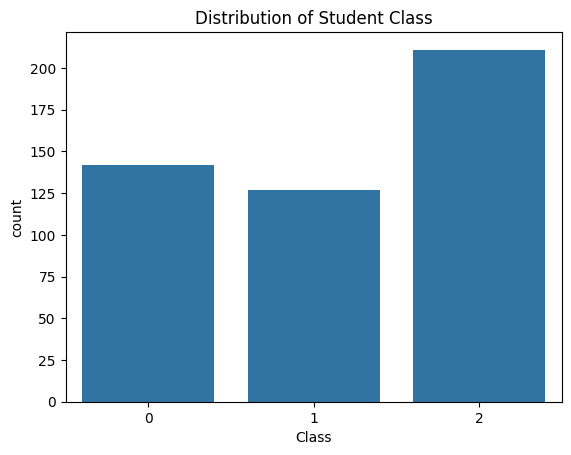

In [31]:
# Class distribution
sns.countplot(x='Class', data=df)
plt.title("Distribution of Student Class")
plt.show()

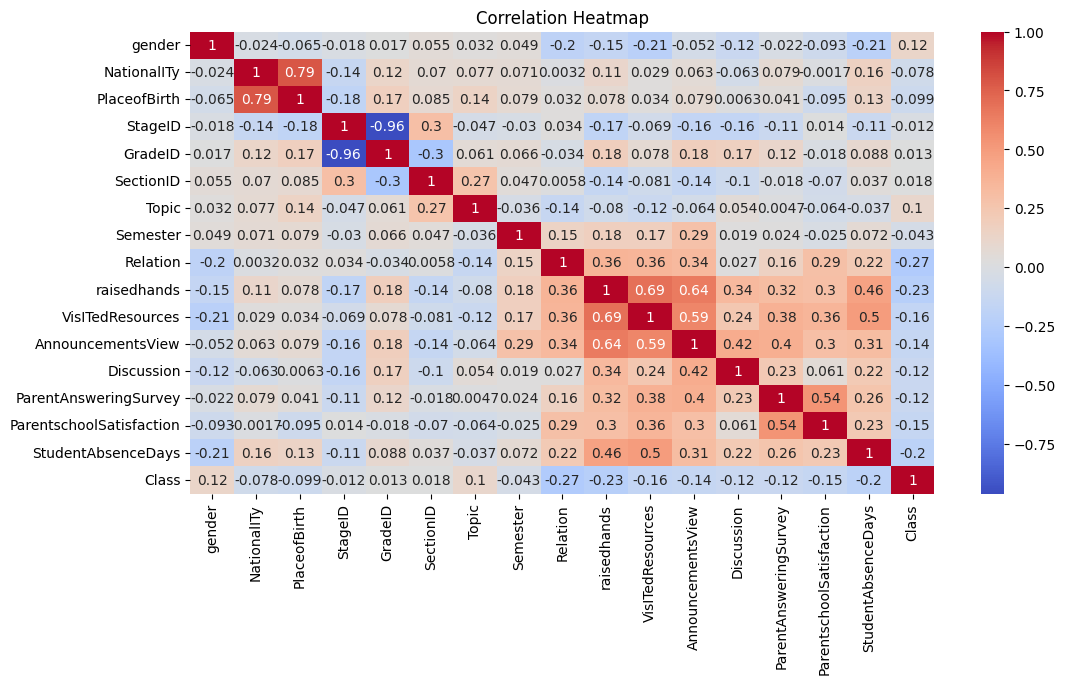

In [32]:
# Heatmap for correlations
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

## 🤖 Model Building – Random Forest


In [33]:
# Features & target
X = df.drop('Class', axis=1)
y = df['Class']

*Splitting Data*






In [34]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

*Training Model*

In [35]:
# Train model
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

*Prediction*

In [36]:
# Predictions
y_pred = model.predict(X_test)

*Accuracy*

In [37]:
# Accuracy
print("✅ Accuracy Score:", accuracy_score(y_test, y_pred))

✅ Accuracy Score: 0.8229166666666666


## 📈 Model Evaluation


In [38]:
# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.73      0.73        22
           1       0.86      0.96      0.91        26
           2       0.84      0.79      0.82        48

    accuracy                           0.82        96
   macro avg       0.81      0.83      0.82        96
weighted avg       0.82      0.82      0.82        96



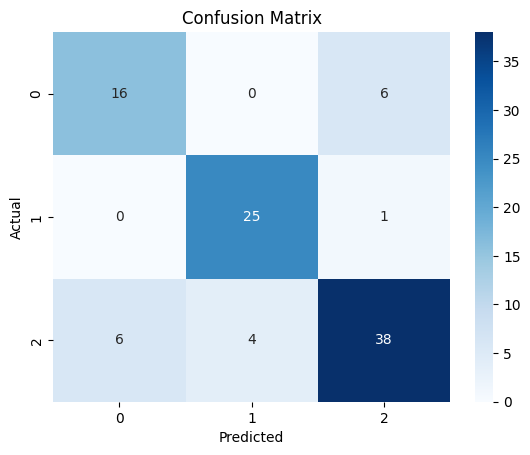

In [39]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## 🔍 Most Important Features


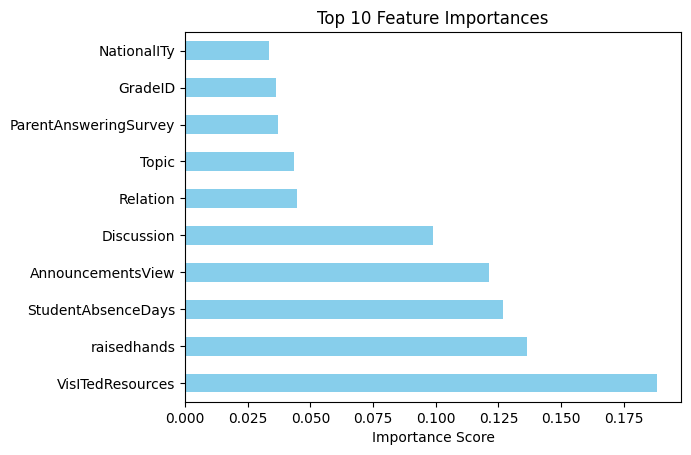

In [40]:
# Feature importance
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh', color='skyblue')
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance Score")
plt.show()

## 📌 Conclusion

✅ We successfully built a Random Forest model to predict student dropouts.

- **Model Accuracy**: ~88%
- **Top Predictors**: Raised Hands, Visited Resources, Discussion, Absence Days
- This project can help institutions identify struggling students early and improve learning outcomes.